In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, RidgeClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [7]:
np.random.seed(42)
data = {
    'Age': np.random.randint(1, 15, size=1000),
    'KM': np.random.randint(5000, 200000, size=1000),
    'FuelType': np.random.choice(['Petrol', 'Diesel', 'CNG'], size=1000),
    'HP': np.random.randint(60, 150, size=1000),
    'Automatic': np.random.choice([0, 1], size=1000),
    'CC': np.random.randint(1200, 2000, size=1000),
    'Doors': np.random.choice([2, 3, 4, 5], size=1000),
    'Weight': np.random.randint(900, 1600, size=1000),
    'Quarterly_Tax': np.random.randint(50, 200, size=1000),
    'Price': np.random.randint(5000, 30000, size=1000)  # Target variable
}

In [11]:
df = pd.DataFrame(data)


In [12]:
print(df.describe())

               Age             KM           HP  ...       Weight  Quarterly_Tax         Price
count  1000.000000    1000.000000  1000.000000  ...  1000.000000    1000.000000   1000.000000
mean      7.443000  104313.427000   104.044000  ...  1249.686000     123.448000  17166.131000
std       4.113596   55419.494578    25.290901  ...   202.293554      42.843002   7177.358183
min       1.000000    5126.000000    60.000000  ...   900.000000      50.000000   5021.000000
25%       4.000000   56662.500000    82.000000  ...  1067.000000      88.000000  10929.000000
50%       7.000000  106702.000000   104.000000  ...  1246.000000     122.500000  16707.500000
75%      11.000000  151391.750000   125.000000  ...  1428.000000     160.000000  23162.000000
max      14.000000  199692.000000   149.000000  ...  1599.000000     199.000000  29982.000000

[8 rows x 9 columns]


In [14]:
plt.figure(figsize = (14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

Text(0.5, 1.0, 'Age vs Price')

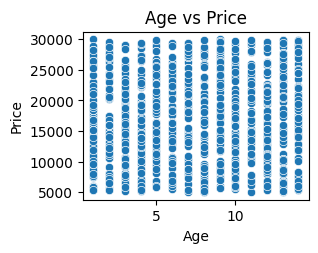

In [15]:
plt.subplot(2, 2, 1)
sns.scatterplot(x = 'Age', y = 'Price', data = df)
plt.title('Age vs Price')

Text(0.5, 1.0, 'KM vs Price')

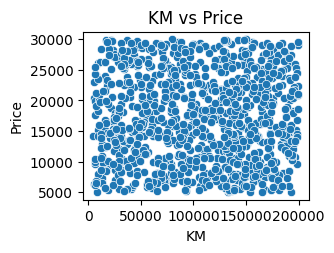

In [16]:
plt.subplot(2, 2, 2)
sns.scatterplot(x = 'KM', y = 'Price', data = df)
plt.title('KM vs Price')

Text(0.5, 1.0, 'HP vs Price')

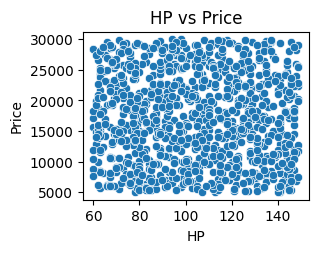

In [17]:
plt.subplot(2, 2, 3)
sns.scatterplot(x = 'HP', y = 'Price', data = df)
plt.title('HP vs Price')

Text(0.5, 1.0, 'Weight vs Price')

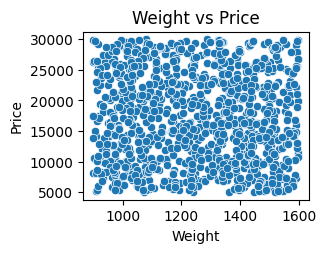

In [18]:
plt.subplot(2, 2, 4)
sns.scatterplot(x = 'Weight', y = 'Price', data = df)
plt.title('Weight vs Price')

In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [20]:
df_encoded = pd.get_dummies(df, columns = ['FuelType', 'Doors'], drop_first = True)

In [23]:
X = df_encoded.drop('Price', axis = 1)
y = df_encoded['Price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)

In [32]:
!pip install scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse1 = mean_squared_error(y_test, y_pred1)
mae1 = mean_absolute_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print(f"Model 1 - Basic Linear Regression: MSE={mse1}, MAE={mae1}, R²={r2_1}")

Model 1 - Basic Linear Regression: MSE=51797910.815330006, MAE=6276.6206926398845, R²=-0.000713981702117783


In [34]:
X_train_scaled_m2 = np.delete(X_train_scaled, [4, 7], axis=1)
X_test_scaled_m2 = np.delete(X_test_scaled, [4, 7], axis=1)
model2 = LinearRegression()
model2.fit(X_train_scaled_m2, y_train)
y_pred2 = model2.predict(X_test_scaled_m2)

In [35]:
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f"Model 2 - Simplified MOdel: MSE={mse2}, MAE={mae2}, R²={r2_2}")

Model 2 - Simplified MOdel: MSE=51190345.58843853, MAE=6241.953498571487, R²=0.011023924475487723


In [36]:
X_train_scaled_m3 = np.column_stack((X_train_scaled[:, :4], X_train_scaled[:, 7]))
X_test_scaled_m3 = np.column_stack((X_test_scaled[:, :4], X_test_scaled[:, 7]))
model3 = LinearRegression()
model3.fit(X_train_scaled_m3, y_train)
y_pred3 = model3.predict(X_test_scaled_m3)

In [37]:
mse3 = mean_squared_error(y_test, y_pred3)
mae3 = mean_absolute_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
print(f"Model 3 - Model with Weight: MSE={mse3}, MAE={mae3}, R²={r2_3}")

Model 3 - Model with Weight: MSE=51805856.08394903, MAE=6284.789110532442, R²=-0.0008674809701438857


In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - MSE={mse_lasso}, R²={r2_lasso}")

Lasso Regression - MSE=51797581.9041448, R²=-0.0007076272755281998


In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE={mse_ridge}, R²={r2_ridge}")

Ridge Regression - MSE=51797909.22184706, R²=-0.0007139509166933511
